<a href="https://colab.research.google.com/github/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/blob/main/Deep_Learning_Fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
!wget https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/blob/main/fintech_banking_dataset.zip?raw=true \
    -O /tmp/fintech_banking_dataset.zip

--2022-07-29 03:35:02--  https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/blob/main/fintech_banking_dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/raw/main/fintech_banking_dataset.zip [following]
--2022-07-29 03:35:02--  https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/raw/main/fintech_banking_dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/main/fintech_banking_dataset.zip [following]
--2022-07-29 03:35:02--  https://raw.githubusercontent.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/

#Fintech

"Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') dilanggan oleh pelanggan atau tidak. Folder data berisi dua kumpulan data: -

     train.csv: 45.211 baris dan 18 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
     test.csv: 4521 baris dan 18 kolom dengan 10% contoh (4521), dipilih secara acak dari train.csv"

### Variabel input:
1.  age : umur (Numeric)
2.  job: jenis pekerjaan (Categorical)
3.  marital : status perkawinan (Categorical)
4.  education : Pendidikan (Categorical)
5.  default: memiliki kredit dalam default? (Categorical) 
6.  perumahan: memiliki pinjaman perumahan? (Categorical)
7.  loan: memiliki pinjaman pribadi? (Categorical)

### Terkait dengan kontak terakhir kampanye saat ini:
8.  contact: jenis komunikasi kontak (Numeric)
9.  month: kontak terakhir bulan tahun (Numeric)
10. day: hari kontak terakhir dalam seminggu (Numeric)
11. duration: durasi kontak terakhir, dalam detik (Numeric)

### Atribut lainnya:
12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (Numeric)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak sebelumnya dihubungi)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategori: 'gagal', 'tidak ada', 'sukses')

Sumber: [Dataset Bank Marketing Portugis](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

##Setup

In [177]:
import pathlib
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from google.colab import data_table
import tensorflow as tf
from sklearn.metrics import confusion_matrix

## Load Data

In [344]:
data_url = "/tmp/fintech_banking_dataset.zip"
data_dir = zipfile.ZipFile(data_url, 'r')
data_dir.extractall("MyFile")
data_dir.close()

In [345]:
dataset_train=pd.read_csv('MyFile/train.csv', delimiter=";")
dataset_test=pd.read_csv('MyFile/test.csv', delimiter=";")

##Data Explorer

In [180]:
print(f"jumlah data untuk train adalah {len(dataset_train)}")
print(f"jumlah data untuk test adalah {len(dataset_test)}")

jumlah data untuk train adalah 45211
jumlah data untuk test adalah 4521


In [181]:
dataset_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [182]:
dataset_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

melihat type pada data set

In [183]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [184]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Insight**:

***age, day*** std < mean, sebaran data semakin akurat dengan mean

***balance, campaign, pdays, previous*** std > mean yang dimana nilai mean merupakan representasi yang buruk dari keseluruhan data

***duration*** merupakan output kontak terakhir kampanye sehingga tidak bisa dimasukan ke model


In [185]:
dataset_train_analyst = dataset_train.copy()

In [186]:
numeric_data = dataset_train_analyst.describe()
numeric_data

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [187]:
category_data = dataset_train_analyst.drop(columns=["y"]).describe(include=[object])
category_data

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959

###Visualisasi data variable categorial  

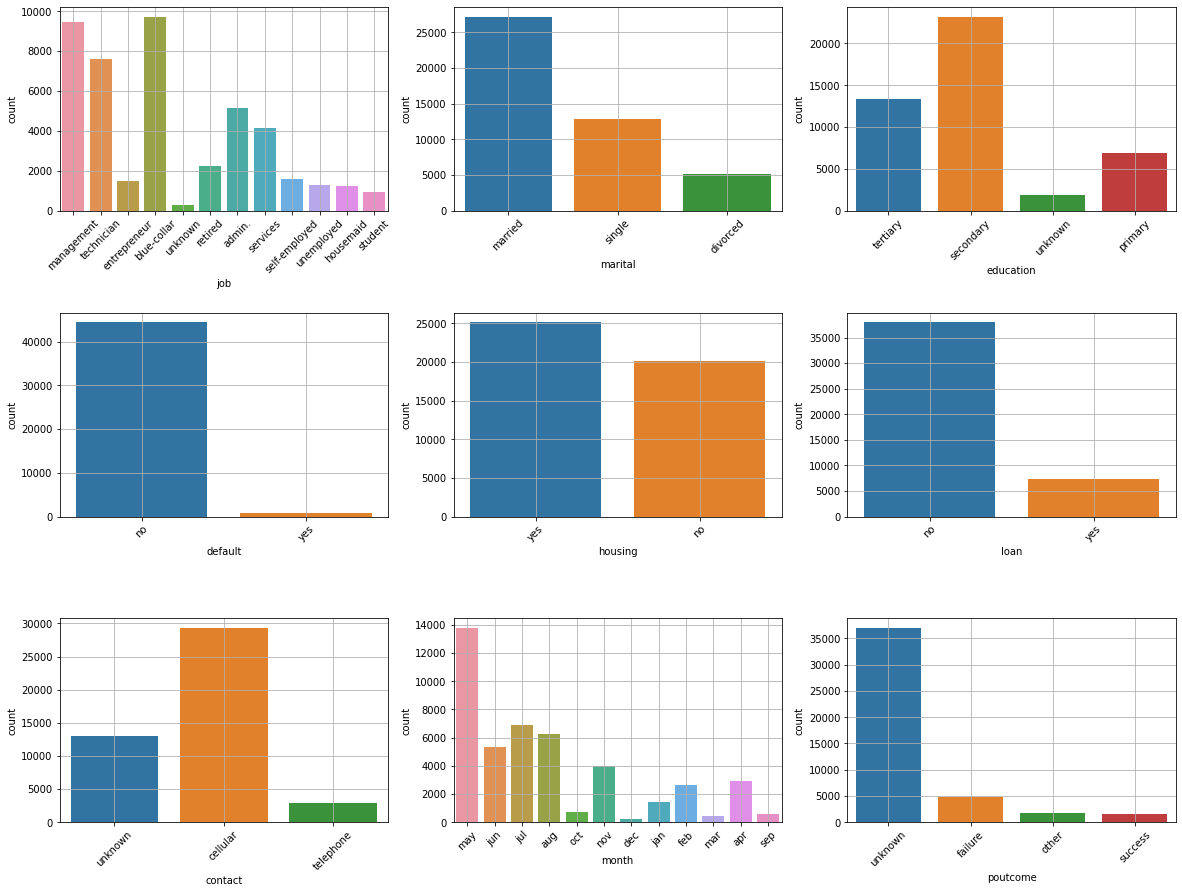

In [188]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for col,i in zip(category_data.columns, ax.flatten()):
  g = sns.countplot(x=col, data=dataset_train, ax=i)
  g.tick_params(axis="x", rotation=45)
  i.grid(True)
plt.subplots_adjust(hspace=0.5)
plt.show()

###Visualisasi Sebaran Data Numeric

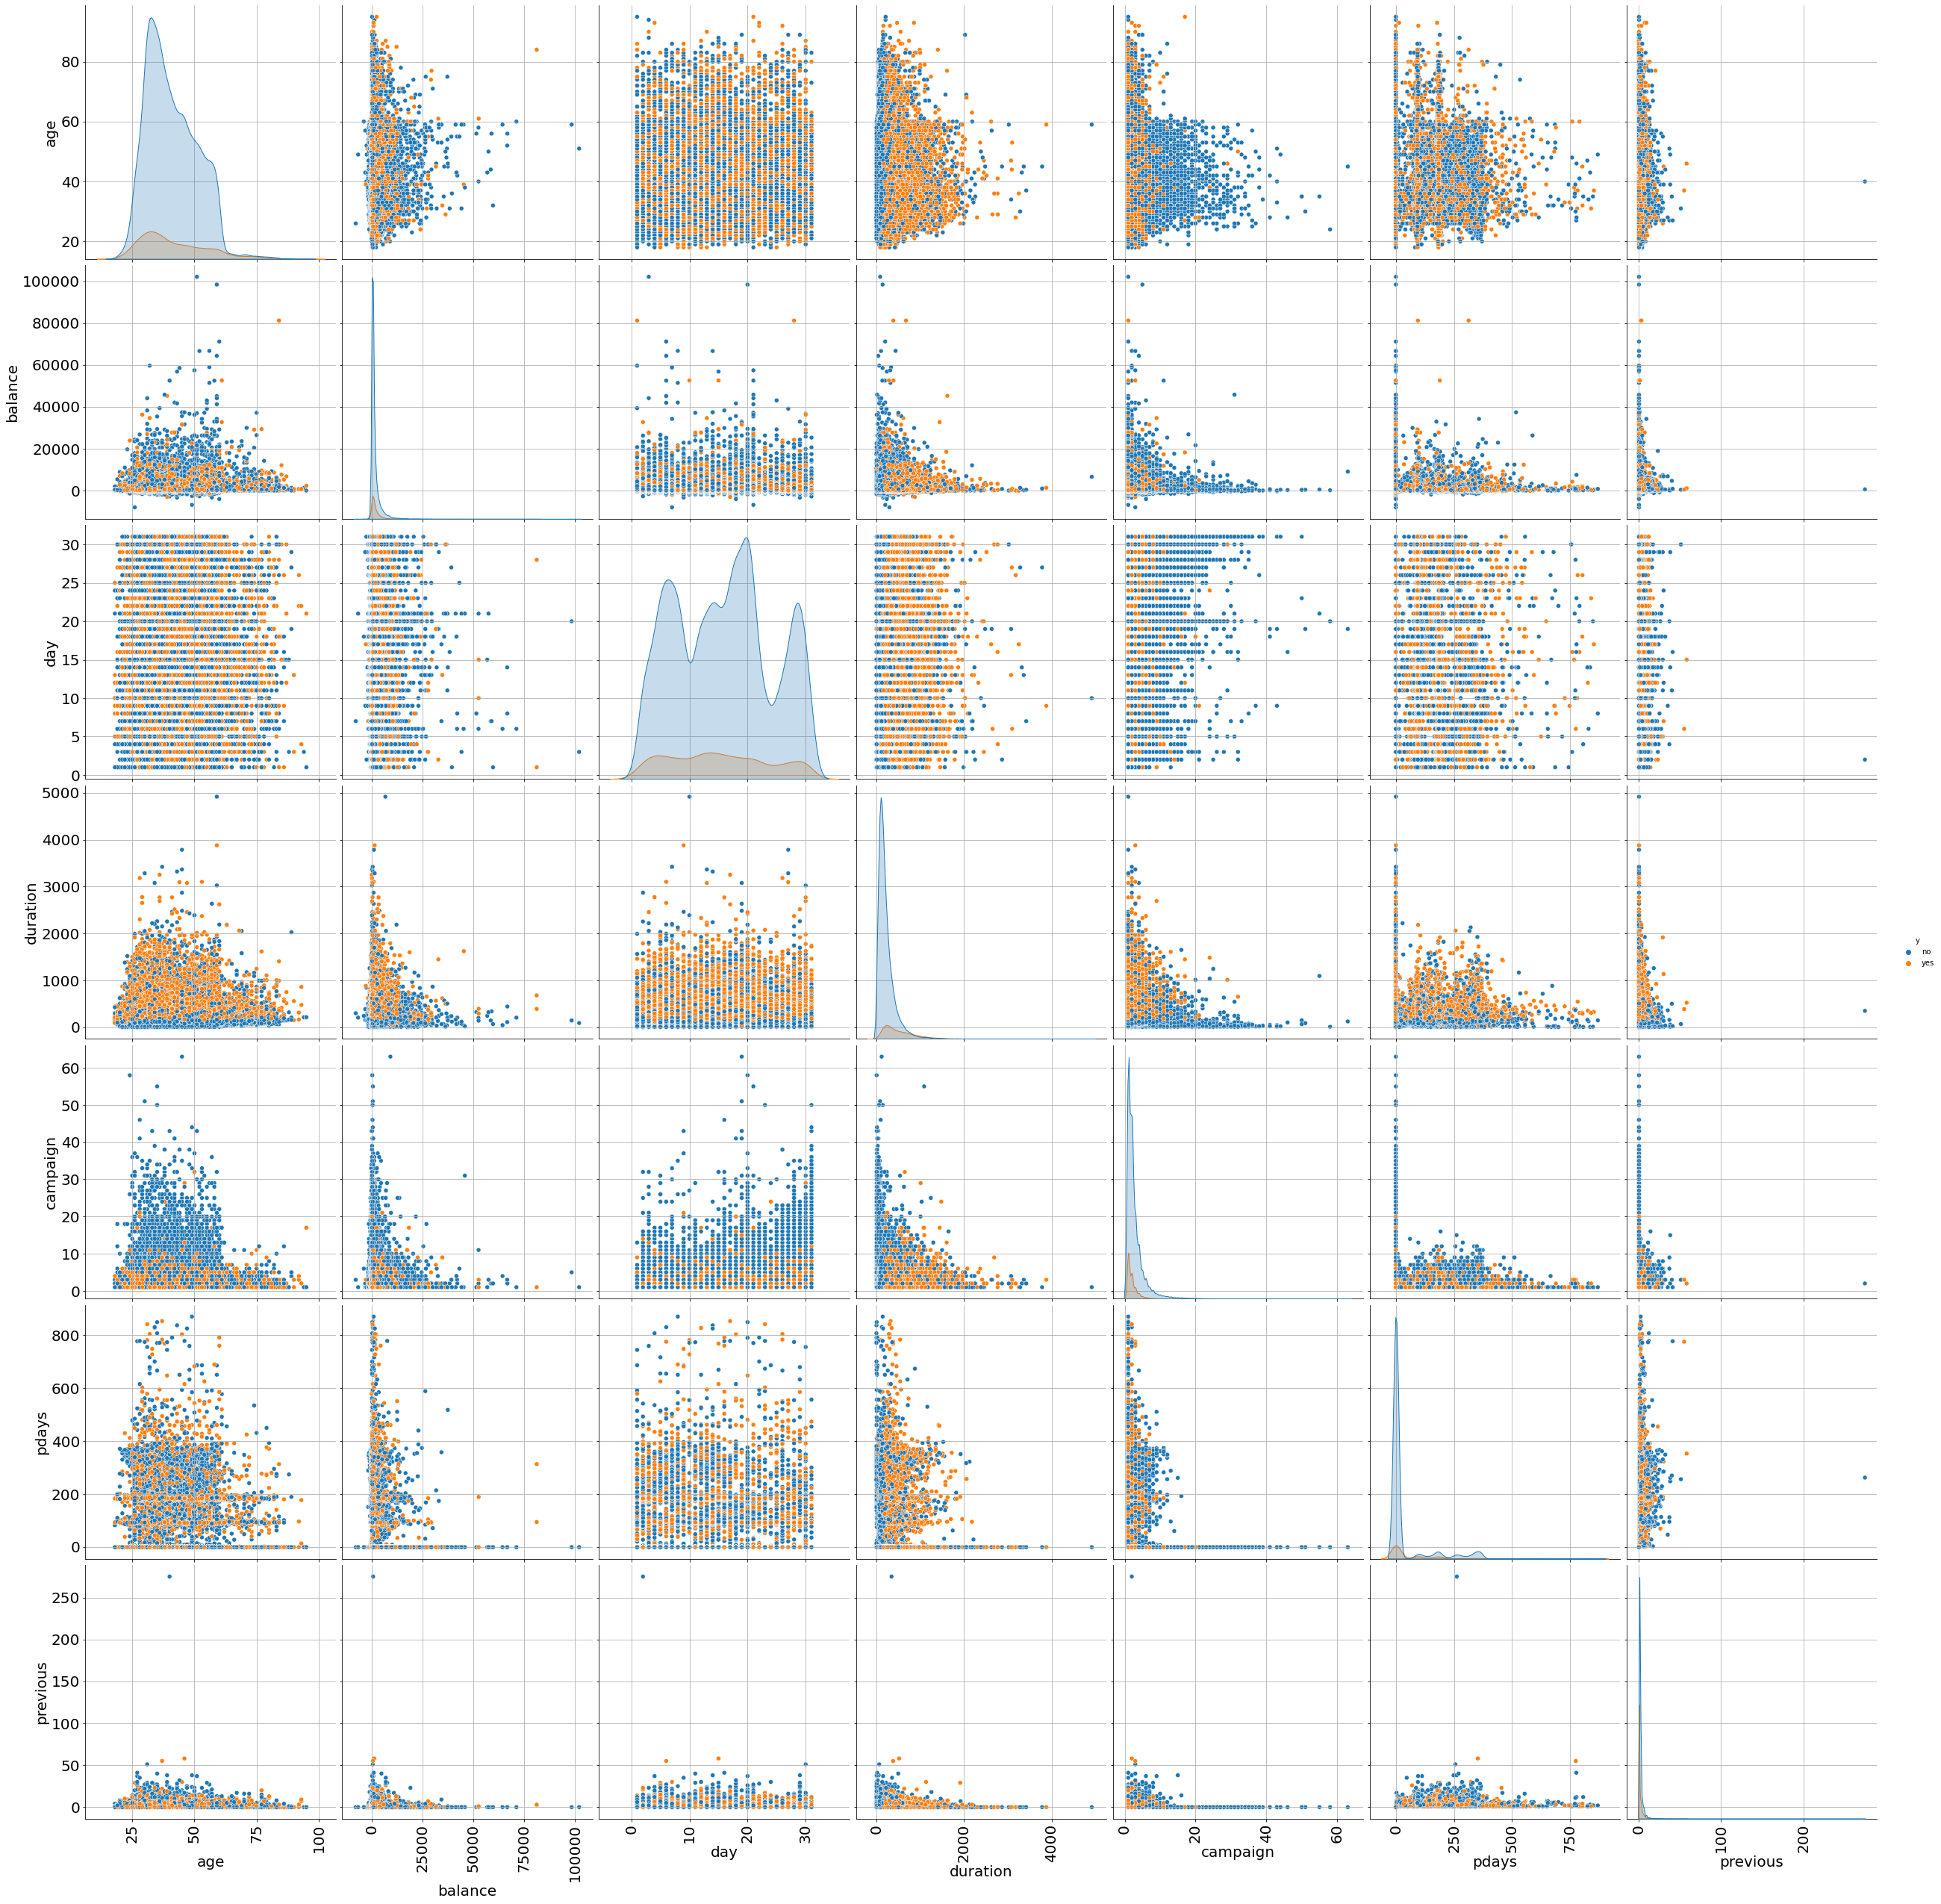

In [189]:
scatter_plot_data = dataset_train_analyst.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

###Visualisasi data boxplot

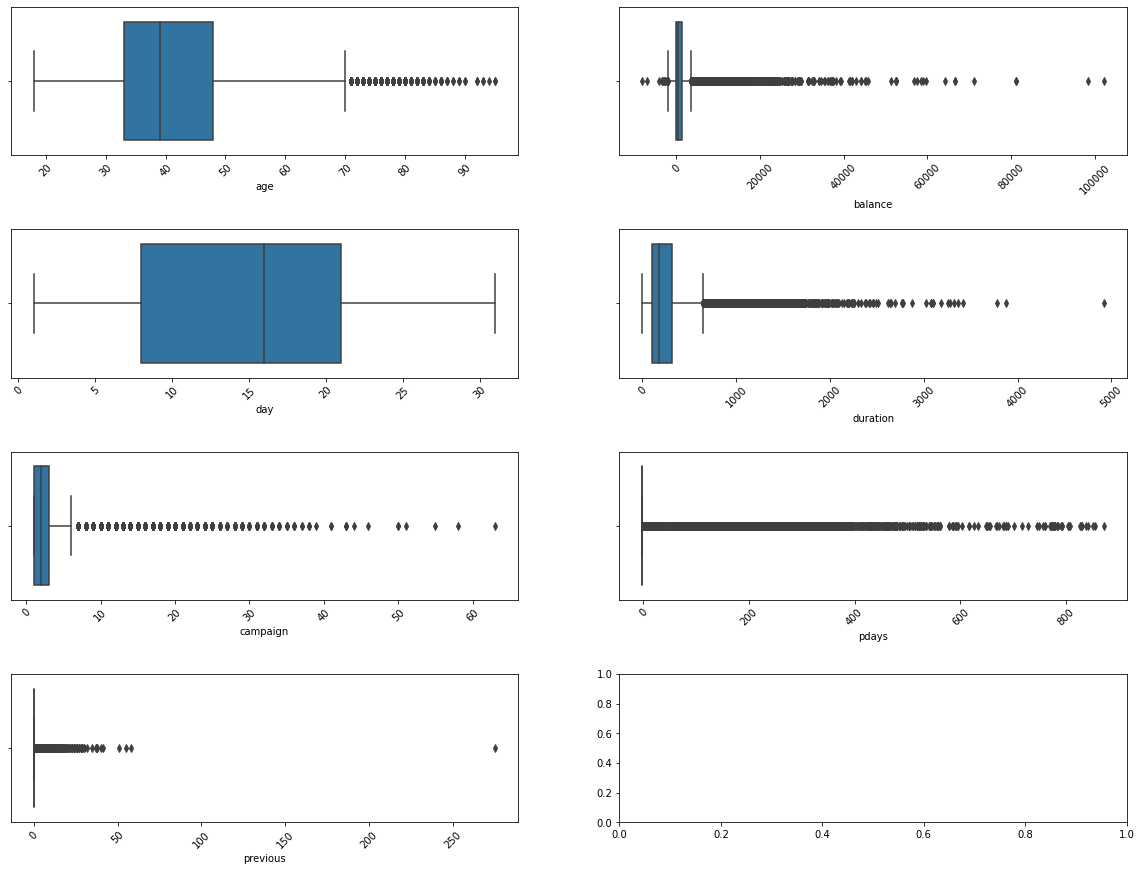

In [190]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
for col,i in zip(numeric_data.columns, ax.flatten()):
  g = sns.boxplot(x=col, data=dataset_train, ax=i)
  g.tick_params(axis="x", rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.show()

##Feature Selection

In [373]:
dataset_train_fc = dataset_train.copy()

In [374]:
Q1_balance = numeric_data.loc['25%', 'balance']
Q3_balance = numeric_data.loc['75%', 'balance']
IQR_balance = Q3_balance - Q1_balance
outlier_upper_balance = Q3_balance +  (1.5 * IQR_balance)
outlier_lower_balance = Q1_balance +  (1.5 * IQR_balance)

Q1_campaign = numeric_data.loc['25%', 'campaign']
Q3_campaign = numeric_data.loc['75%', 'campaign']
IQR_campaign = Q3_campaign - Q1_campaign
outlier_upper_campaign = Q3_campaign +  (1.5 * IQR_campaign)
outlier_lower_campaign = Q1_campaign +  (1.5 * IQR_campaign)

Q1_pdays = numeric_data.loc['25%', 'pdays']
Q3_pdays = numeric_data.loc['75%', 'pdays']
IQR_pdays = Q3_pdays - Q1_pdays
outlier_upper_pdays = Q3_pdays +  (1.5 * IQR_pdays)
outlier_lower_pdays = Q1_pdays +  (1.5 * IQR_pdays)

Q1_previous = numeric_data.loc['25%', 'previous']
Q3_previous = numeric_data.loc['75%', 'previous']
IQR_previous = Q3_previous - Q1_previous
outlier_upper_previous = Q3_previous +  (1.5 * IQR_previous)
outlier_lower_previous = Q1_previous +  (1.5 * IQR_previous)

print("Check Outlier balance = ", outlier_lower_balance, " - "  ,outlier_upper_balance)
print("Check Outlier campaign = ", outlier_lower_campaign, " - " , outlier_upper_campaign)
print("Check Outlier pdays = ", outlier_lower_pdays, " - "  ,outlier_upper_pdays)
print("Check Outlier previous = ", outlier_lower_previous, " - " , outlier_upper_previous)

Check Outlier balance =  2106.0  -  3462.0
Check Outlier campaign =  4.0  -  6.0
Check Outlier pdays =  -1.0  -  -1.0
Check Outlier previous =  0.0  -  0.0


In [375]:
dataset_train_fc = dataset_train_fc.loc[
                                              # dataset_train_fc['balance'].ge(outlier_lower_balance)&
                                              # dataset_train_fc['balance'].le(outlier_upper_balance)&
                                              dataset_train_fc['campaign'].ge(outlier_lower_campaign)&
                                              dataset_train_fc['campaign'].le(outlier_upper_campaign)
]
print(dataset_train_fc.shape)

(6577, 17)


In [376]:
dataset_train_fc.describe()

age       balance          day     duration     campaign  \
count  6577.000000   6577.000000  6577.000000  6577.000000  6577.000000   
mean     41.595104   1258.050175    17.066900   240.033146     4.660788   
std      10.228716   2933.412736     8.152353   262.549267     0.785380   
min      18.000000  -4057.000000     1.000000     0.000000     4.000000   
25%      33.000000     55.000000    11.000000    87.000000     4.000000   
50%      40.000000    409.000000    18.000000   157.000000     4.000000   
75%      49.000000   1314.000000    23.000000   286.000000     5.000000   
max      92.000000  98417.000000    31.000000  3078.000000     6.000000   

             pdays     previous  
count  6577.000000  6577.000000  
mean     29.190056     0.550251  
std      87.344346     2.143770  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     667.000000    37.000000

In [377]:
dataset_train_fc.drop(columns=["y"]).describe(include=[object])

job  marital  education default housing  loan   contact month  \
count         6577     6577       6577    6577    6577  6577      6577  6577   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq          1476     4189       3248    6444    3435  5526      4331  1800   

       poutcome  
count      6577  
unique        4  
top     unknown  
freq       5734

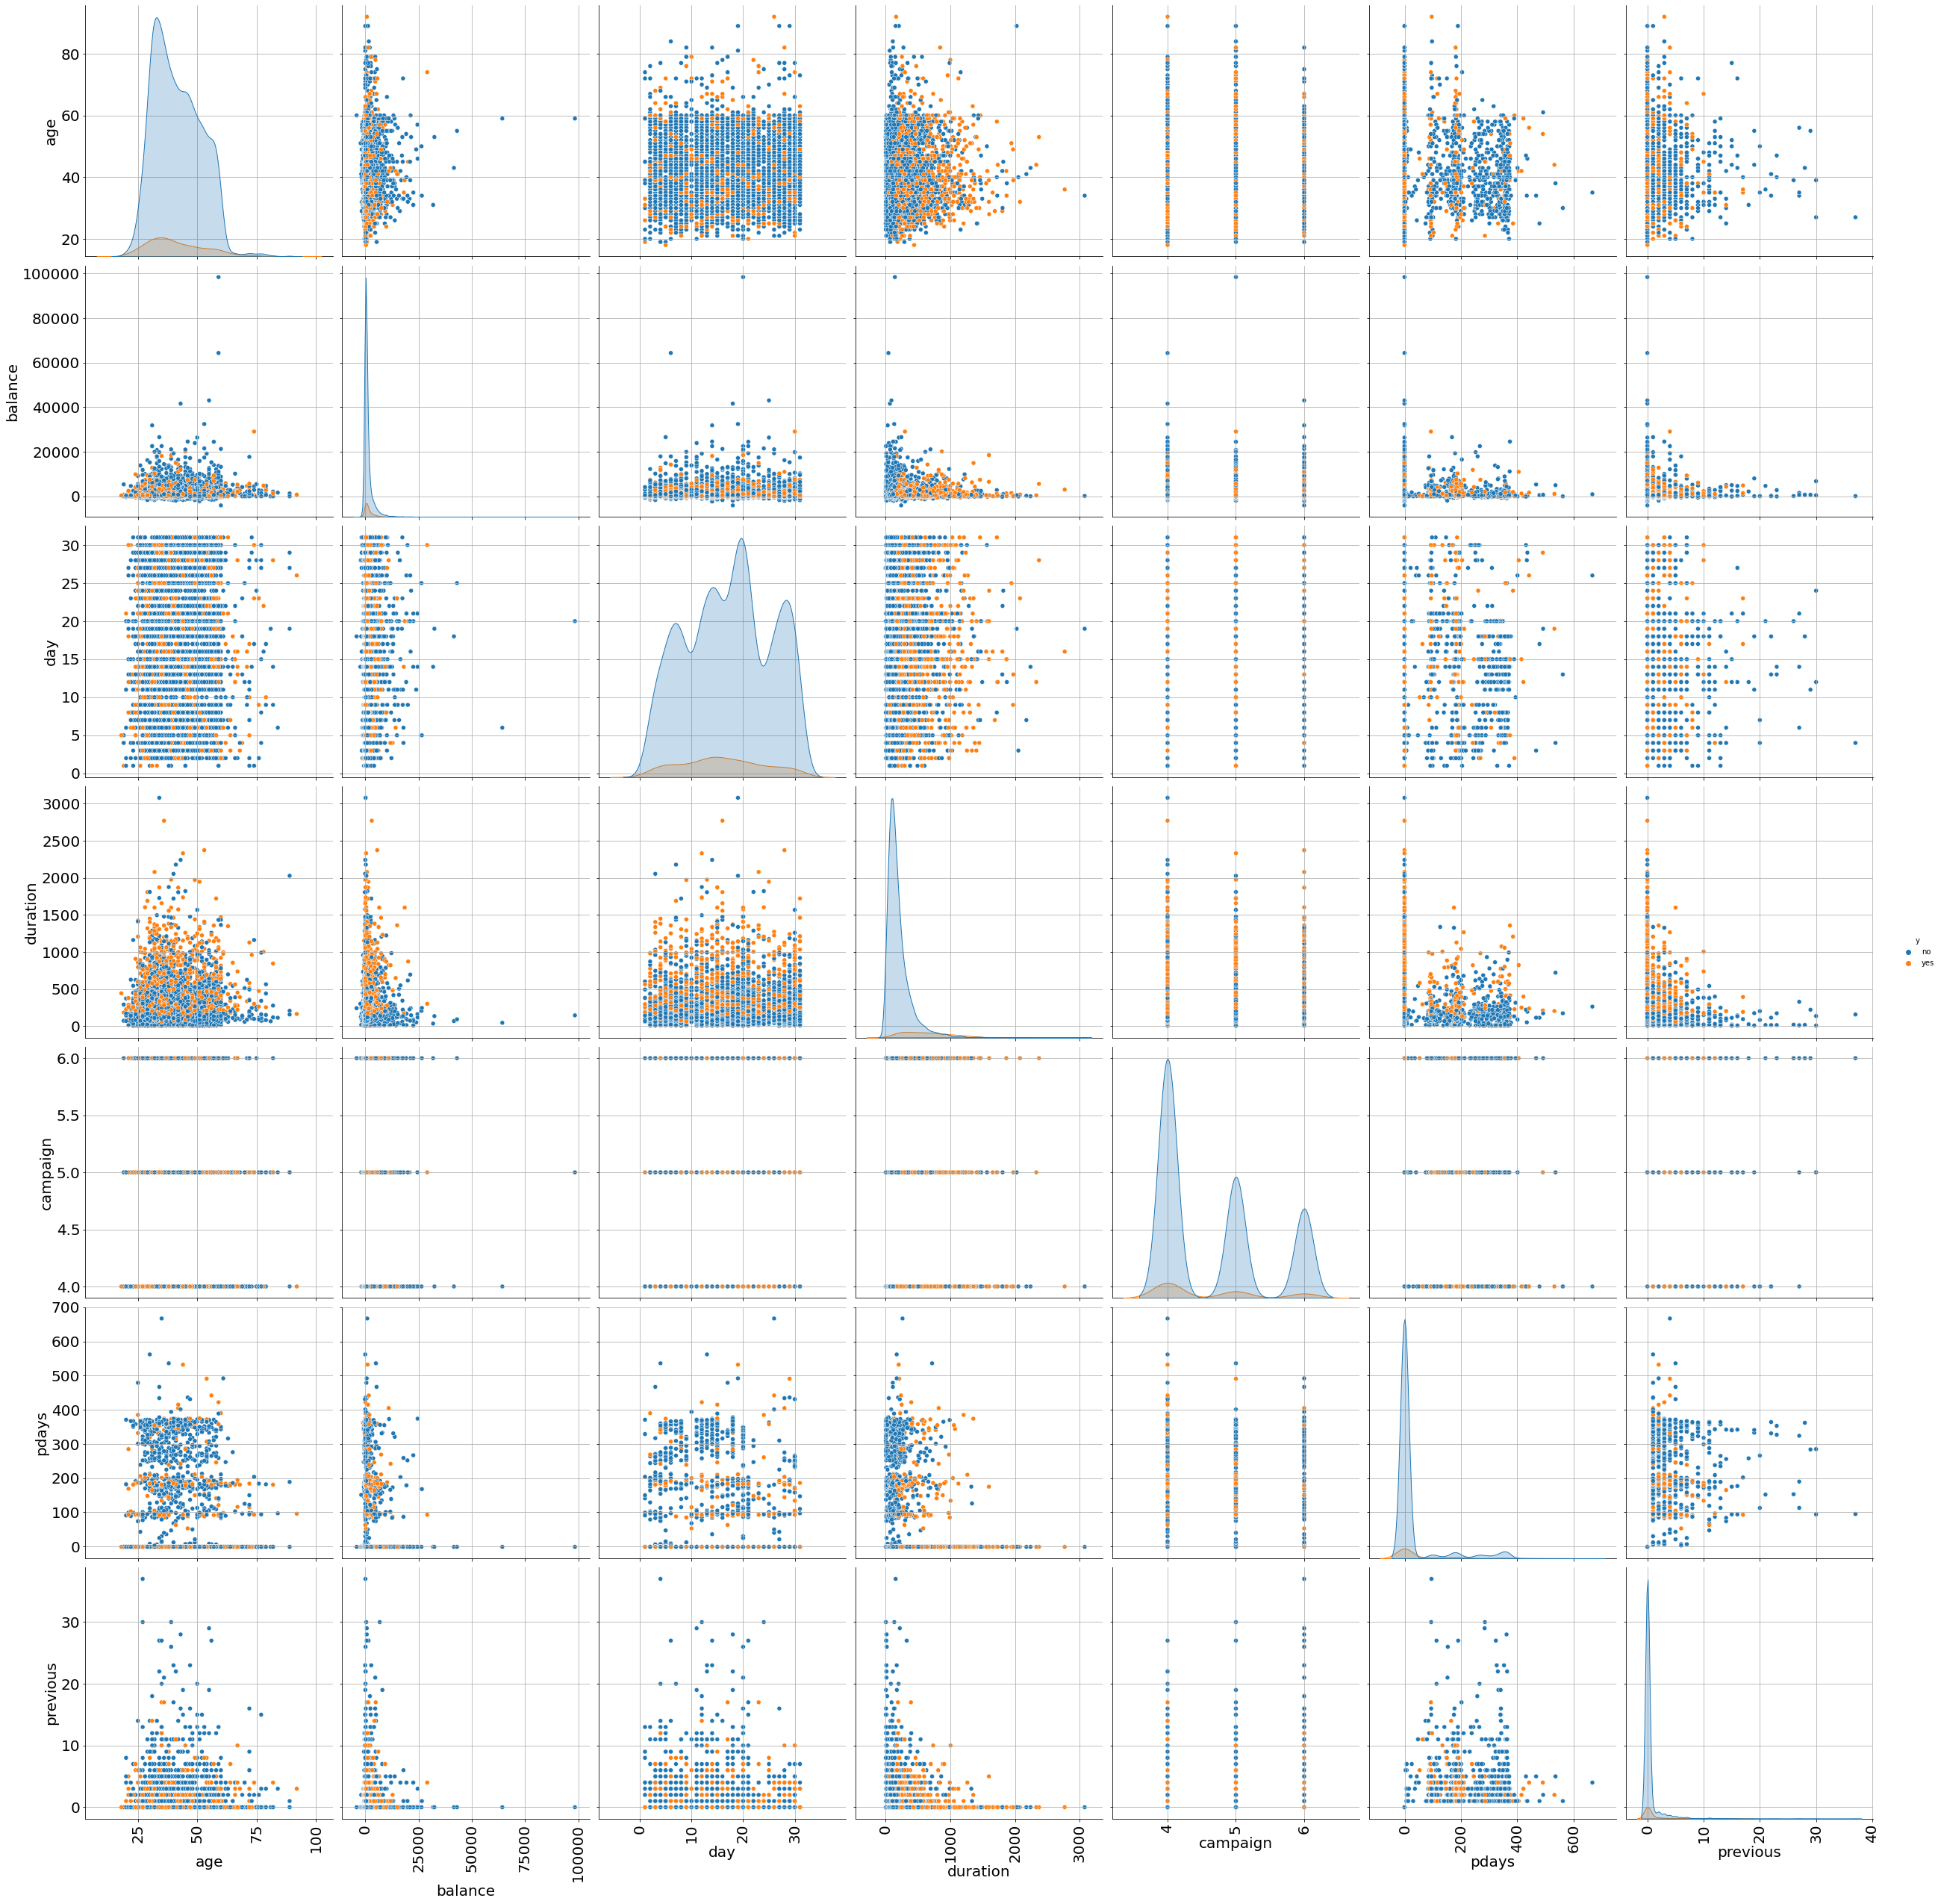

In [378]:
scatter_plot_data = dataset_train_fc.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

##Helper Function

function split data

In [352]:
def dataframe_split(data, ratio= 0.2, shuffle= 0):
  len_ = int(len(data) - (ratio*len(data)))
  if shuffle == 0 :
    part_  = data.iloc[:int(1 + len_)]
    rest_part_ = data.drop(part_.index)
  elif shuffle == 1:
    part_ = data.sample(frac = 1.0 - ratio)
    rest_part_ = data.drop(part_.index)
  return (part_, rest_part_)

fucntion membuat dataset

In [353]:
def dataframe_to_dataset(data, batch_size=32):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [354]:
def dataframe_imbalance_to_dataset(data, 
                                   batch_size=32, 
                                   shuffle=32, 
                                   weights=[0.5, 0.5]):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  data = tf.data.Dataset.from_tensor_slices((dict(df), labels)).batch(batch_size)

  no_ds = (data
          .unbatch()
          .filter(lambda features, label: label==0)
          .shuffle(shuffle)
          .repeat())
  yes_ds = (data
            .unbatch()
            .filter(lambda features, label: label==1)
            .shuffle(shuffle)
            .repeat())
  
  ds = tf.data.Dataset.sample_from_datasets([no_ds, yes_ds], weights=weights)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

function preprocessing numeric

In [355]:
def numeric_preprocessing(name, dataset, step):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Normalization()
  layer.adapt(feature_dataset, steps=step)

  return layer

In [356]:
def numeric_to_categories_preprocessing(name, dataset, step, num_bins, output_mode="multi_hot"):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Discretization(num_bins=num_bins, epsilon=0.00001)
  layer.adapt(feature_dataset, steps=step)
  
  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=num_bins, output_mode=output_mode)
  return lambda feature:  category_encoding(layer(feature))

fucntion preprocessing categories

In [357]:
def categories_preprocessing(name, dataset, dtype, step=1, output_mode="multi_hot"):
  if(dtype == "int64"):
    lookup = tf.keras.layers.IntegerLookup()
  else:
    lookup = tf.keras.layers.StringLookup()
  feature_dataset = dataset.map(lambda x,y: x[name])
  lookup.adapt(feature_dataset, steps=step)

  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode=output_mode)
  return lambda feature:  category_encoding(lookup(feature))

plot metric

In [358]:
def plot_metric(x, y, history, metric):
  fig, ax = plt.subplots(x, y, figsize=(15,10))
  epochs = range(len(history.history[metric[0]]))
  for metric, ax in zip(metric, ax.flatten()):
    ax.plot(epochs, history.history[metric], 'r', label='train')
    ax.plot(epochs, history.history['val_'+metric], 'b', ls="--", label='val')
    ax.set_ylabel(metric)
    ax.set_xlabel('epoch')
    ax.legend()  
  plt.show()

plot confution matrix

In [359]:
def plot_confution_matrix(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Tidak Berlangganan dengan Prediksi yang tepat (True Negatives): ', cm[0][0])
  print('Tidak Berlangganan dengan Prediksi yang salah (False Positives): ', cm[0][1])
  print('Berlangganan dengan Prediksi yang salah (False Negatives): ', cm[1][0])
  print('Berlangganan dengan Prediksi yang tepat (True Positives): ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

##Data Preprocessing

mengubah column y, dengan nilai 0 menunjukan *NO* dan nilai 1 menunjukan *YES*

In [360]:
dataset_train_model = dataset_train_fc.copy()

In [361]:
dataset_train_model['target'] = dataset_train_model.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_train_model.drop(columns=["duration", "day", "pdays", "previous", "month", "contact", "y"], inplace=True)

In [362]:
dataset_test['target'] = dataset_test.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_test.drop(columns=["duration", "day", "pdays", "previous", "month", "contact", "y"], inplace=True)

dataset train ini merupakan dataframe pandas, split data train dengan ratio 80:20 . 20 % untuk validasi

In [363]:
test, val = dataframe_split(dataset_test, ratio = 0.05, shuffle=1)

In [364]:
print(len(test), 'training examples')
print(len(val), 'validation examples')

4295 training examples
226 validation examples


membuat dataset

In [365]:
batch_size = 128
step = 128

train_ds = dataframe_imbalance_to_dataset(dataset_train_model, batch_size=batch_size, weights=[0.5, 0.5])
val_ds = dataframe_to_dataset(val, batch_size=batch_size)
test_ds = dataframe_to_dataset(test, batch_size=batch_size)

cek data

In [366]:
for features, labels in train_ds.take(1):
  print(labels.numpy())

[0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1]


membagikan column berdasarkan numeric atau categorical integer atau string

In [367]:
bins= []
num_to_categorical_keys = []
num_keys = ["age", "balance", "campaign"]
categorical_string_keys = ["job", "marital", "education", "poutcome"]
binary_string_keys = ["housing", "loan", "default"]
all_inputs = []
all_preprocessors = []

In [368]:
for categorical in binary_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [369]:
for categorical in categorical_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [370]:
# for num_cat, bin in zip(num_to_categorical_keys, bins):
#   input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
#   num_cat_layer = numeric_to_categories_preprocessing(name=num_cat, dataset=train_ds, step=step, num_bins=bin, output_mode="one_hot")
#   num_cat_preprocessor = num_cat_layer(input)
#   all_inputs.append(input)
#   all_preprocessors.append(num_cat_preprocessor)

In [371]:
for num_cat in num_keys:
  input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
  num_layer = numeric_preprocessing(name=num_cat, dataset=train_ds, step=step)
  num_preprocessor = num_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_preprocessor)

In [372]:
all_inputs, all_preprocessors

([<KerasTensor: shape=(None, 1) dtype=string (created by layer 'housing')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'loan')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'default')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'job')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'marital')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'education')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'poutcome')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'age')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'balance')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'campaign')>],
 [<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_49')>,
  <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_50')>,
  <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'cate

##Model

In [334]:
all_features = tf.keras.layers.concatenate(all_preprocessors)
x = tf.keras.layers.Dense(8, activation=tf.keras.activations.relu)(all_features)
x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(8, activation=tf.keras.activations.relu)(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(8, activation=tf.keras.activations.relu)(x)
# x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(all_inputs, output)

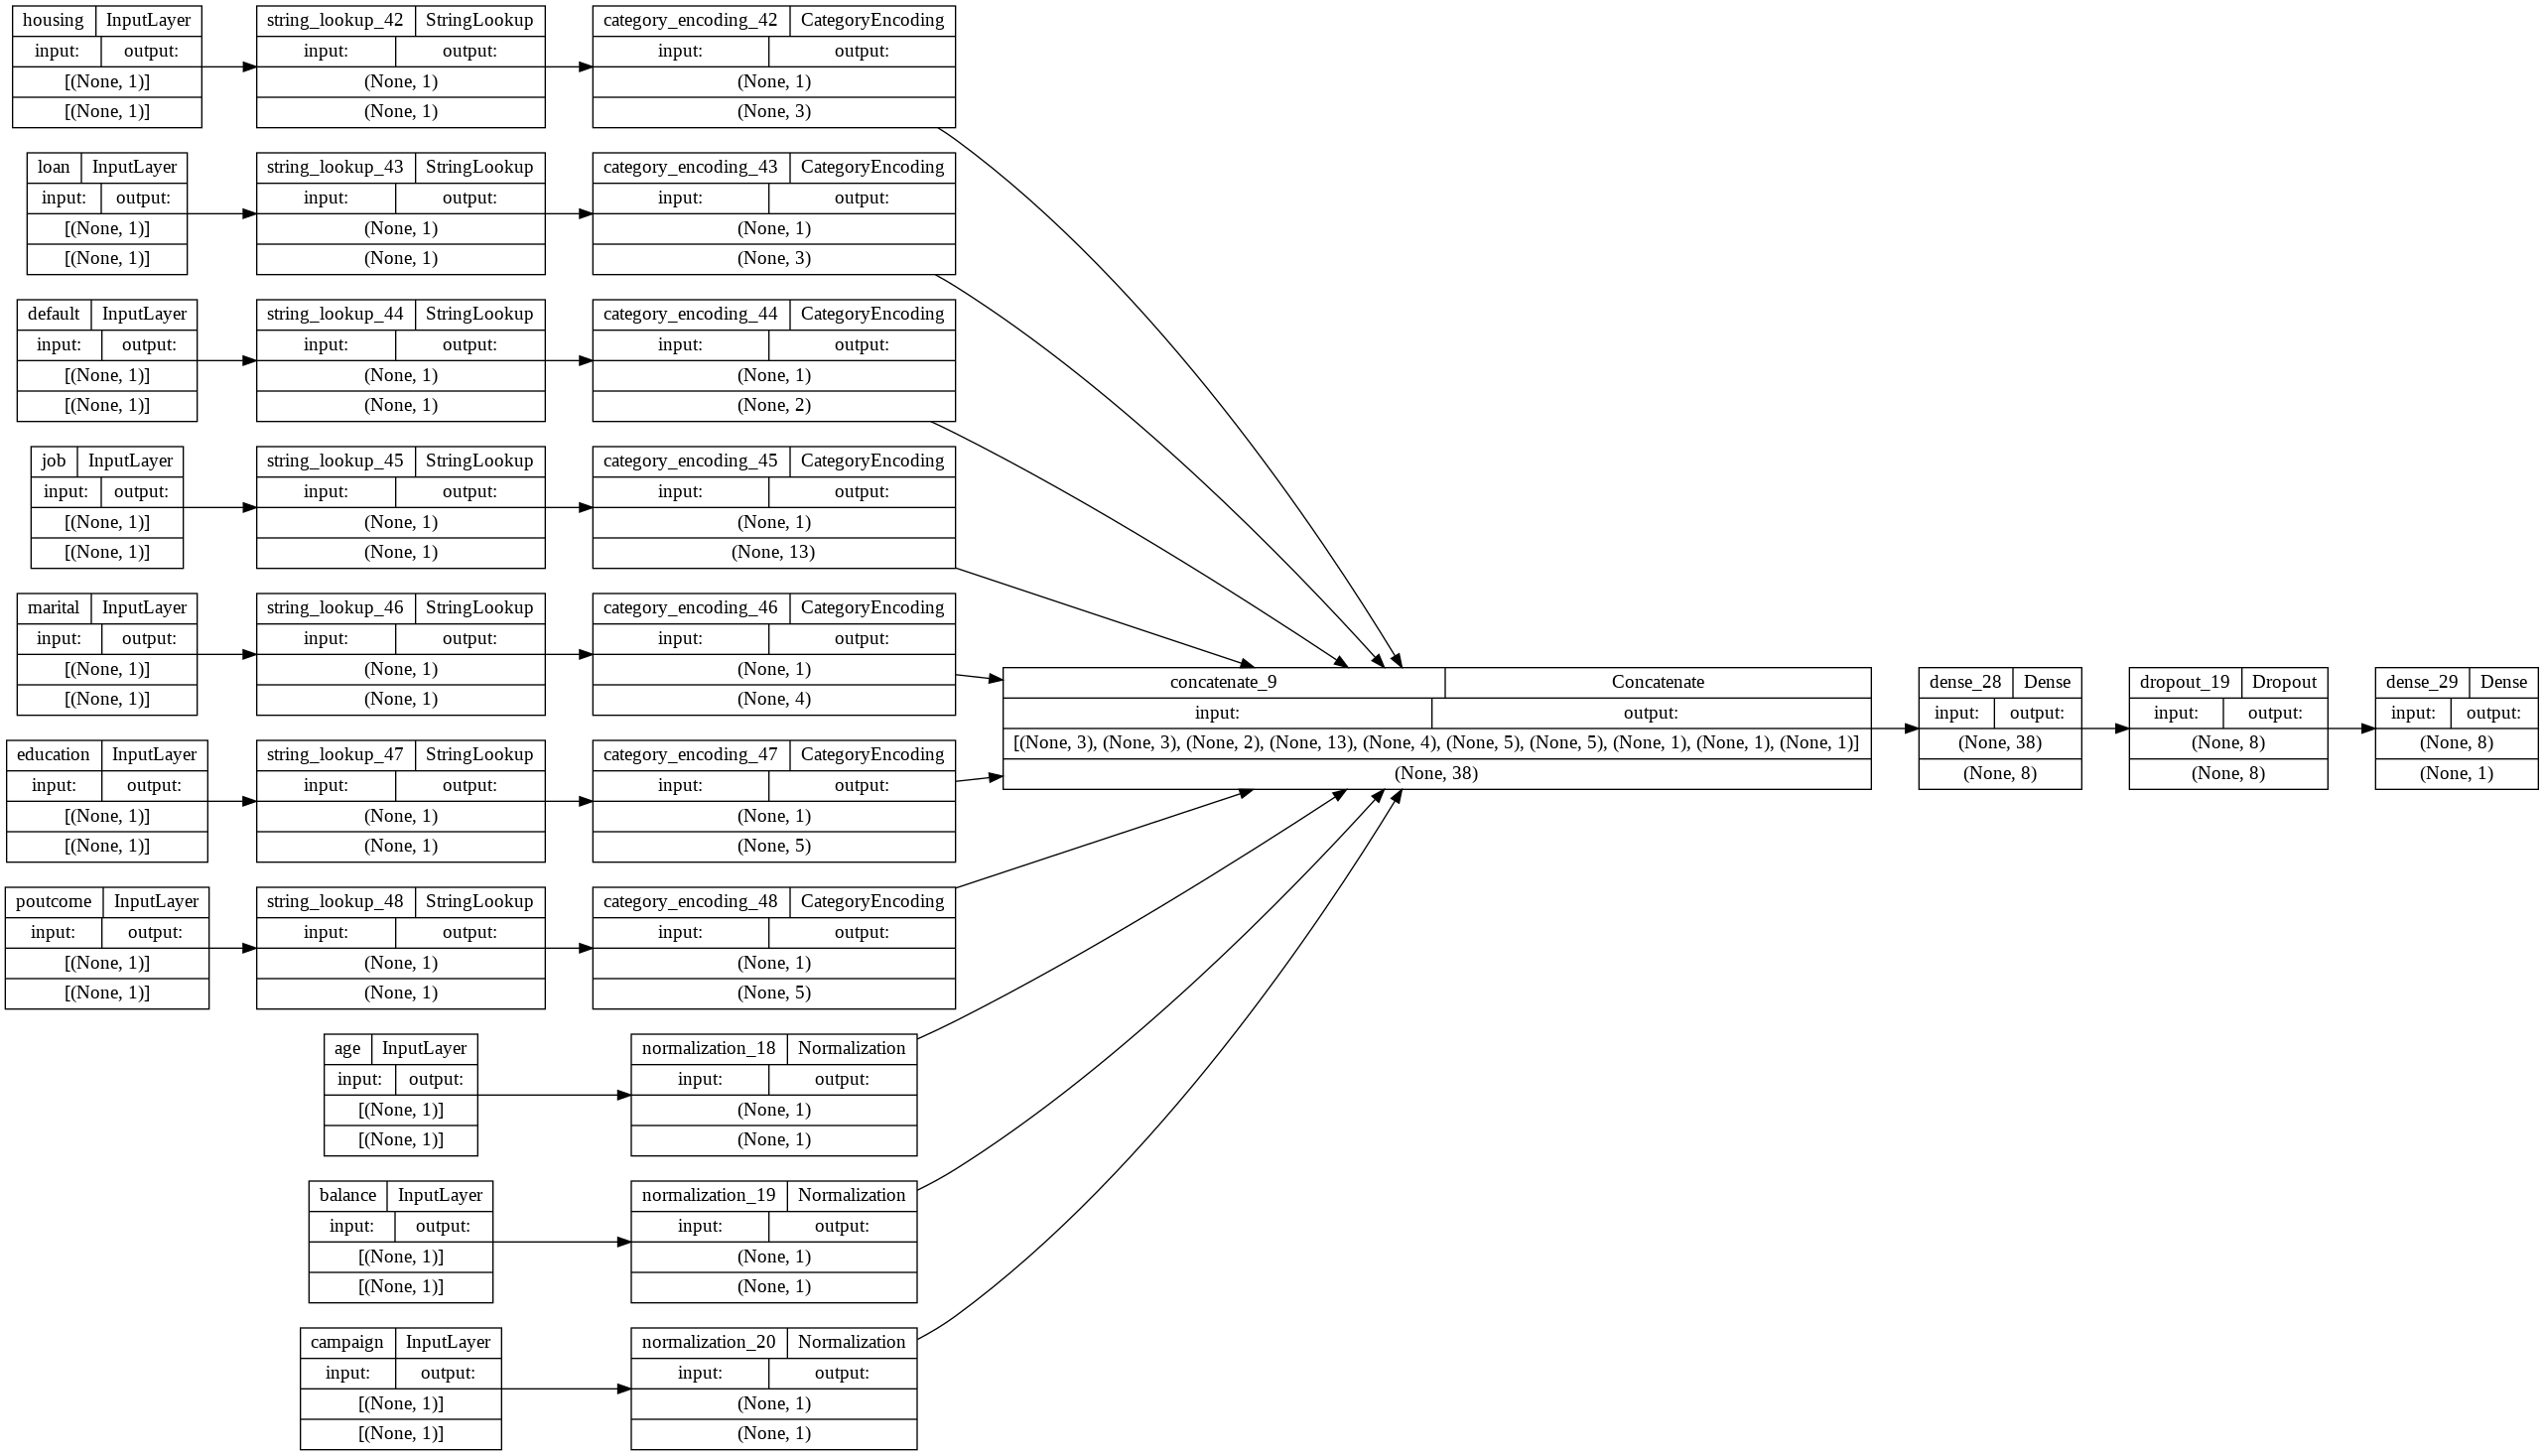

In [335]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [336]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.5, name='specificity')
]
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [337]:
loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[loss, val_loss], steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 4s 71ms/step - loss: 0.6796 - tp: 1246.0000 - fp: 909.0000 - tn: 1130.0000 - fn: 811.0000 - accuracy: 0.5801 - precision: 0.5782 - recall: 0.6057 - specificity: 0.6305 - val_loss: 0.5466 - val_tp: 0.0000e+00 - val_fp: 21.0000 - val_tn: 179.0000 - val_fn: 26.0000 - val_accuracy: 0.7920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_specificity: 0.4231
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6605 - tp: 1505.0000 - fp: 991.0000 - tn: 1067.0000 - fn: 533.0000 - accuracy: 0.6279 - precision: 0.6030 - recall: 0.7385 - specificity: 0.7252 - val_loss: 0.5373 - val_tp: 0.0000e+00 - val_fp: 13.0000 - val_tn: 187.0000 - val_fn: 26.0000 - val_accuracy: 0.8274 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_specificity: 0.5000
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6414 - tp: 1428.0000 - fp: 780.0000 - tn: 1294.0000 - fn: 594.0000 - accuracy: 0.6646 - 

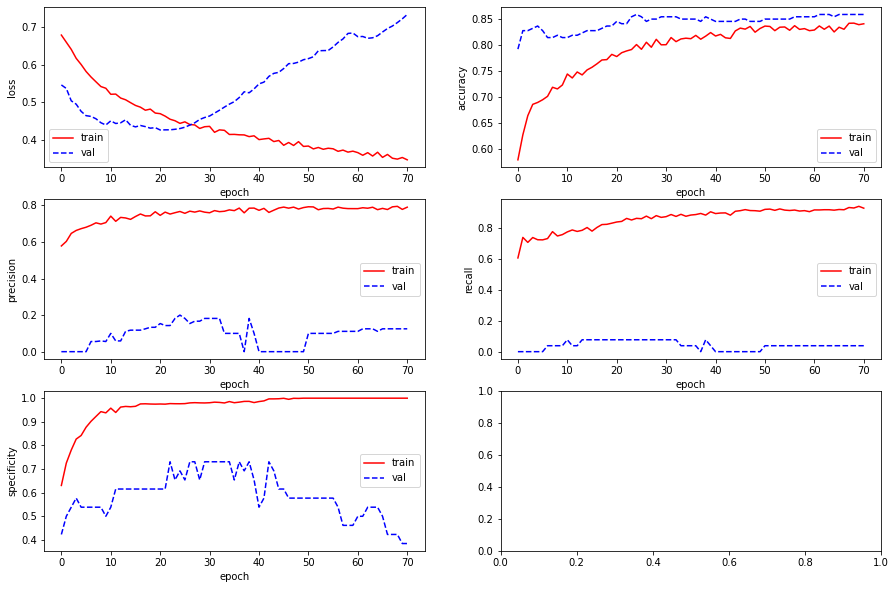

In [338]:
metric = ['loss', 'accuracy', 'precision', 'recall', 'specificity']
plot_metric(3,2, history, metric)

In [379]:
model.trainable_weights

[<tf.Variable 'dense_28/kernel:0' shape=(38, 8) dtype=float32, numpy=
 array([[-3.21304739e-01,  2.77168065e-01, -2.64733940e-01,
          3.01712006e-01,  6.31802678e-02,  1.83066815e-01,
          2.27869183e-01,  3.48746777e-04],
        [ 3.20289522e-01,  1.79949805e-01, -4.00979705e-02,
          8.07568133e-02,  4.18394834e-01,  2.98416964e-03,
          4.15533274e-01, -2.32081607e-01],
        [-3.35047573e-01,  2.10396852e-02,  6.10021591e-01,
          3.28772455e-01,  2.33840048e-01,  1.91530466e-01,
         -1.38970926e-01,  1.49465203e-01],
        [ 2.43487626e-01,  1.29544467e-01,  2.58937150e-01,
         -2.20285147e-01, -1.78341389e-01, -1.06512934e-01,
          3.89941037e-02, -1.31106630e-01],
        [ 4.42449212e-01,  1.19663581e-01, -4.44585606e-02,
         -4.03050184e-01,  3.35301131e-01,  2.10543886e-01,
         -1.12567335e-01,  1.15641564e-01],
        [-3.30797434e-02, -3.47780198e-01,  4.11295295e-01,
          7.49363452e-02, -2.71480441e-01,  5.7843

##Evaluate Model

In [339]:
predict_test = model.predict(test_ds)
test_ds_unbach = test_ds.unbatch()
label_test = [i[1] for i in list(test_ds_unbach.as_numpy_iterator())]


34/34 [==============================] - 0s 3ms/step - loss: 0.4300 - tp: 59.0000 - fp: 241.0000 - tn: 3559.0000 - fn: 436.0000 - accuracy: 0.8424 - precision: 0.1967 - recall: 0.1192 - specificity: 0.6182
loss :  0.43004846572875977
tp :  59.0
fp :  241.0
tn :  3559.0
fn :  436.0
accuracy :  0.842374861240387
precision :  0.1966666728258133
recall :  0.11919192224740982
specificity :  0.6181818246841431
Tidak Berlangganan dengan Prediksi yang tepat (True Negatives):  3559
Tidak Berlangganan dengan Prediksi yang salah (False Positives):  241
Berlangganan dengan Prediksi yang salah (False Negatives):  436
Berlangganan dengan Prediksi yang tepat (True Positives):  59
Total:  495


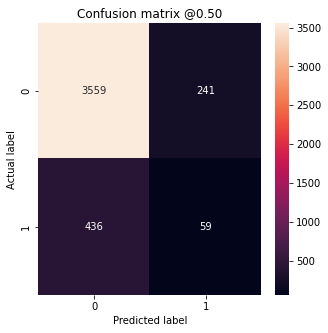

In [340]:
model_evaluate = model.evaluate(test_ds)
for name_metric, value_evaluate in zip(model.metrics_names, model_evaluate):
  print(name_metric, ': ', value_evaluate)

plot_confution_matrix(label_test, predict_test)

##Simulation

In [341]:
dataset_test.sort_values(by=["target"], ascending=False).columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'poutcome', 'target'],
      dtype='object')

In [342]:
sample = {
    'age': 51,
    'job': 'retired',
    'marital': 'divorced',
    'education': 'secondary',
    'balance': 1679,
    'housing': 'no',
    'loan': 'no',
    'default': 'no',
    'campaign': 1,
    'poutcome': 'other'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    f"Probabilitas untuk berlangganan deposito berjangka adalah {round(100 * predictions[0][0], 2)} % "
    f"untuk setuju "
    f"{predictions}"
)

Probabilitas untuk berlangganan deposito berjangka adalah 10.35 % untuk setuju [[0.10347882]]
